# Exploratory Data Analysis of The `band_data` Data Table

In [1]:
import os

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = os.path.join('..', 'data', 'band_data.csv')
metal = pd.read_csv(filepath, index_col=0)
black_metal = metal[metal['genre'] == 'black']
death_metal = metal[metal['genre'] == 'death']

In [3]:
metal.head()

,url,name,country,genre,full_genre,status
id,,,,,,
3540355748,https://www.metal-archives.com/bands/%DB%9E/35...,۞,United States,black,Black Metal,Split-up
3540353044,https://www.metal-archives.com/bands/-_-_-/354...,- - -,Sweden,black,Atmospheric Black Metal,Unknown
3540409614,https://www.metal-archives.com/bands/%E2%80%94...,—,China,black,Raw Black Metal,Changed name
3540443454,https://www.metal-archives.com/bands/%3AInfern...,:Inferno 9:,Italy,black,Black Metal,Active
3540469859,https://www.metal-archives.com/bands/%3AK%C3%A...,:Kælte:,Germany,black,Atmospheric Black Metal,Active


## Comparison of Black and Death Genres

In [4]:
metal['genre'].value_counts()

death    51190
black    41914
Name: genre, dtype: int64

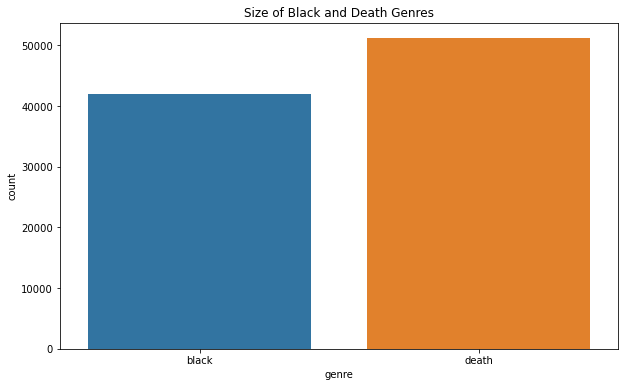

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=metal, x='genre', ax=ax)
ax.set_title('Size of Black and Death Genres')
plt.show()

## Countries of Origin for Metal Bands

In [6]:
metal_top_20_country = metal['country'].value_counts(ascending=False).head(20)

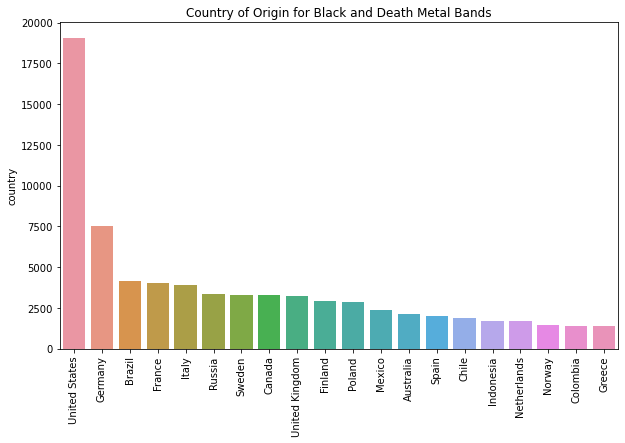

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=metal_top_20_country.index, y=metal_top_20_country, ax=ax)
ax.set_title('Country of Origin for Black and Death Metal Bands')
ax.set_xticklabels(metal_top_20_country.index, rotation=90)
plt.show()

## What is in a bands name?

There are three problems in making a GAN that takes a ficticious band name as input into the generator neural network. First, the input needs to be in a vectorized format. This presents a problem in that band names have a variable length of characters in the name. Second, band names are variable in length, which would be incompatible with the input to a neural network layer.

I plan to solve the problem of vectorization in a novel way. I'll take the input string and decompose it to the ASCII character values 

For example, the string `black` would be vectorized as:

```
    vec = [ord(c) for c in list('black')]
    output(vec)
    >>> [98, 108, 97, 99, 107]
```

Then (using 10 as a set vector length),

```
    diff = 10 - len(vec)
    for i in range(diff):
        vec.append(0)
    output(vec)
    >>> [98, 108, 97, 99, 107, 0, 0, 0, 0, 0]
```

Additionally, the vectorized input should be 


In [8]:
vec = np.array([ord(c) for c in list('black')])

print(vec)

[ 98 108  97  99 107]


### Length of Band Names

In order to build the GAN, 

In [9]:
name_lengths = metal['name'].str.len()

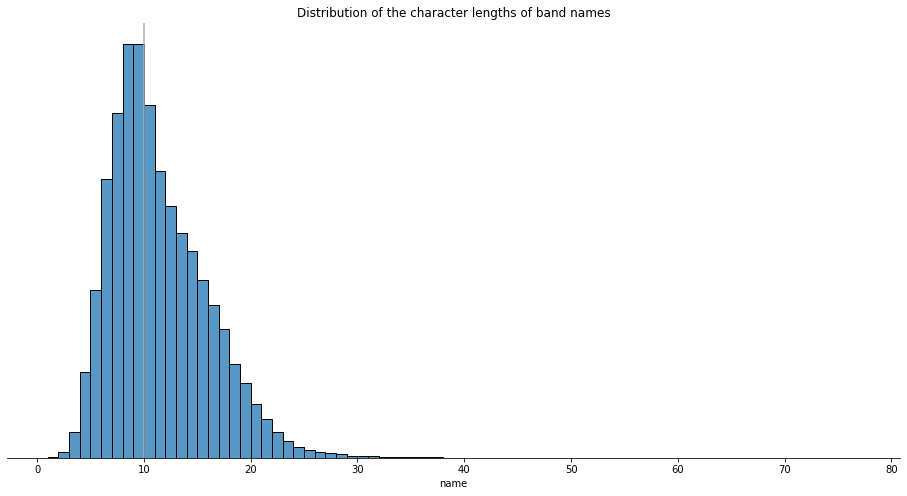

In [28]:
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(name_lengths, binwidth=1)
ax.axvline(name_lengths.median(), color='#aeaeae')
ax.set_title('Distribution of the character lengths of band names')
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

### How many band names are under 25 characters?

In [11]:
# This number can be tweaked to find the optimal vec
max_vec_len = 25

char_limit_mask = metal['name'].str.len().lt(max_vec_len)
char_limit_mask_len = char_limit_mask.sum()
total = len(metal['name'])

len_percent = char_limit_mask_len / total
print(f'{len_percent:.02%} ({char_limit_mask.sum()} of {total}) of band names are less than {max_vec_len} characters.')

99.14% (92307 of 93104) of band names are less than 25 characters.


### How many band names contain only ASCII alphanumeric characters?

In [12]:
# This number can be tweaked to find the optimal vec
ascii_mask = metal['name'].apply(lambda s: s.isascii())
ascii_mask_len = ascii_mask.sum()

ascii_percent = ascii_mask_len / total
print(f'{ascii_percent:.02%} ({ascii_mask_len} of {total}) of band names contain only ASCII characters.')

95.96% (89345 of 93104) of band names contain only ASCII characters.


### How many band names are both under 25 characters **and** ASCII alphanumeric characters?

In [13]:
combined_mask = char_limit_mask & ascii_mask
combined_mask_len = combined_mask.sum()

combined_percent = combined_mask_len / total
print(f'{combined_percent:.02%} ({combined_mask_len} of {total}) of band names meet both criteria.')

95.14% (88580 of 93104) of band names meet both criteria.


In [14]:
# The regex sequence [^A-Z 0-9] selects for any characters that are not (^) words (A-Z), spaces ( ), or digits (0-9).
alnum_names = metal.loc[combined_mask, 'name'].str.upper().str.replace('[^A-Z 0-9]', '', regex=True).str.strip()

blank_mask = alnum_names == ''

clean_names = alnum_names[~blank_mask]
clean_names.head(50)

id
3540443454               INFERNO 9
3540404191                   NIHUS
33438                    AAAARRGHH
3540439329    AND DARKNESS FOLLOWS
231                     AND OCEANS
3540355934                  DIESES
3540289576            OF CELESTIAL
82136                 ON THE NIGHT
3540411185            SICK OF LIFE
3540427593       UNDER A FULL MOON
58217                          357
3540465411                      MT
3540332807                    NEMA
3540477290                       O
3540460927                   DOLCH
20535                         VEGA
3540410502                 OCTOBER
3540453116                    IH8P
3540426927                      IT
111793                       SWORN
3540257015            3 BROADSWORD
3540365286                    LAIR
3540384774                       0
3540471393                    0NUN
3540452035                    1013
3540458508                    1028
3540477583                   11034
5763               122 STAB WOUNDS
27489            